# Zeros of real functions

Unlikely some polynomial functions, that we have some formulas to find the exact roots, it's kind of impossible to know the exact roots of the most part of the existing functions,because there aren't simples methods or formulas available to do it. With that in mind, there was the need to develop numerical methods to find the aproximated roots of any function.

First, let's import some modules to help us.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Bisection method

This method consists in dividing the interval (a,b) by half until it reaches the precision desired to the root:(b-a)<ε

Consider that f(x) is a continuous function in the interval (a,b) and f(a)f(b)<0, which implies that there is at least one root between a and b.



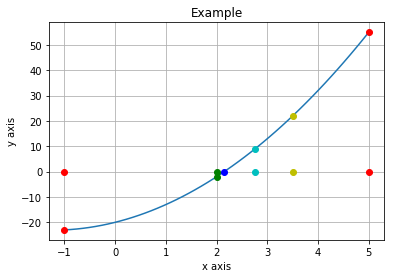

In [23]:
x = np.linspace(-1,5)
a=[2.150367627183861,0]

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Example")

plt.plot(x,2*x**2+5*x-20)

plt.plot(2.150367627183861,0,'bo')

plt.plot(-1,-23,'ro')
plt.plot(5,55,'ro')
plt.plot(5,0,'ro')
plt.plot(-1,0,'ro')

plt.plot(3.5,0,'yo')
plt.plot(3.5,22,'yo')

plt.plot(2,0,'go')
plt.plot(2,-2,'go')

plt.plot(2.75,0,'co')
plt.plot(2.75,8.875,'co')


plt.show()


* ### First step: Choose your interval and the precision wanted
    The zero of the given function f(x) is between the interval (-1,5), we know that because f(-1)f(5)<0!
    Our precision in this case will be ε=0.01 \n
    
    After decided your precision ε, we'll start the process:



* ### Second step: Check if your interval is already good enough for you
    (b-a)<ε it's a quite simple test.
    If the range of the interval is smaller than the precision choosen, any value of the given interval can be accepted.
    
    As you can notice, this is not our case.



* ### Third step: Split your interval by 2
    x=$\frac{(b+a)}{2}$, for our function and the interval choosen:
    
    x=$\frac{(5+(-1))}{2} = 2 \to x=2$ and f(2) are represented by the green points in the graphic
    


* ### Fourth step: Decreasing the interval
    Like it was said before, the whole point of this method is to decrease the interval choosen, but we have to run some tests first.
    Now we'll test if there is a root between (a,x) or (x,b), doind this we'll find the 'real' new interval
    
    If f(a)f(x)<0 -> there is a root of the given function betwwen this interval, so b=x and we have a new interval
    
    If f(x)f(b)<0 -> there is a root of the given function betwwen this interval, so a=x and we have a new interval
    
    In the example f(-1)f(x)>0 and f(x)f(5)<0, so the zero of the function f(x) is in the interval (x,5), so the new interval is (2,5)
    


* ### Fifth step: Testing the new interval
    Now we have to now if the new interval is 'small' enough according to the precision choosen
    (b-a)<ε if the condition was satisfied, any value of the given interval can be accepted 
    If *not*, go back to the step 3 again!
    
    As you can notice, in our example we must to comeback to the step 3 because the condition was not satisfied
    The blue and the yellow points represents the next 2 iterations.k is number of iterations,if k$\to \infty$ we'll find the exact root of the given function.
    
   

In [ ]:
a=input('Enter the start of the interval: ')
b=input('Enter the end of the interval: ')          #Step 1
p=input('Enter the precision that you desire: ')

def f(x):
    return 2*(x**2)+5*x-20

S='Your aproximated root is: '+str((b+a)/2)

if (b-a)<p:  #Step 2
    print S                                        
else:                                               
    k=1 #number of iterations
    M=f(a)
    
    while True:
        x=(a+b)/2   #Step 3
        
        
        if M*f(x)>0:
            a=x
        else:        #Step 4
            b=x                                    
        
        if (b-a)<p:
            x=(a+b)/2  #Step 5
            break
            
        k+=1   
            
print'Your aproximated root is: '+str(x)+' and the number of attempts needed was: '+str(k)

Enter the start of the interval: -1
Enter the end of the interval: 5
Enter the precision that you desire: 0.01


# False Position Method

